In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flpoAgent
import importlib
import random
from scipy.spatial.distance import cdist
import createEnv
from scipy.optimize import Bounds, LinearConstraint, minimize
import supporting_functions
from matplotlib.cm import get_cmap

n_waypoints: 10 
n_agents: 5 
CAT:
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
---------
wp_locations:
[[   5.42641287   -9.58496101]
 [ 336.00629803    4.97607765]
 [ 666.63680691   -5.50406709]
 [ 993.9612573     5.21061424]
 [  -6.61778327  325.10012962]
 [ 337.0405297   342.40120026]
 [ 656.74563199  333.5771786 ]
 [1006.25241923  335.58385467]
 [   4.43510635  662.50418803]
 [ 341.68881578  670.95818233]] 
mask:
[[0 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 1]
 [0 0 1 0 0 1 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 1 0]] 
dist_mat:
[[1.00000000e+08 3.30900415e+02 1.00000000e+08 1.00000000e+08
  3.34901736e+02 1.00000000e+08 1.00000000e+08 1.00000000e+08
  1.00000000e+08 1.00000000e+08]
 [3.30900415e+02 1.00000000e+08 3.30796564e+02 1.00000000e+08
  1.00000000e+08 3.37426708e+02 1.00000000e+08 1.00000000e+08
  1.00000000e+08 1.00000000e+08]
 [1.00000000e+08 3.30796564e+02 1.0

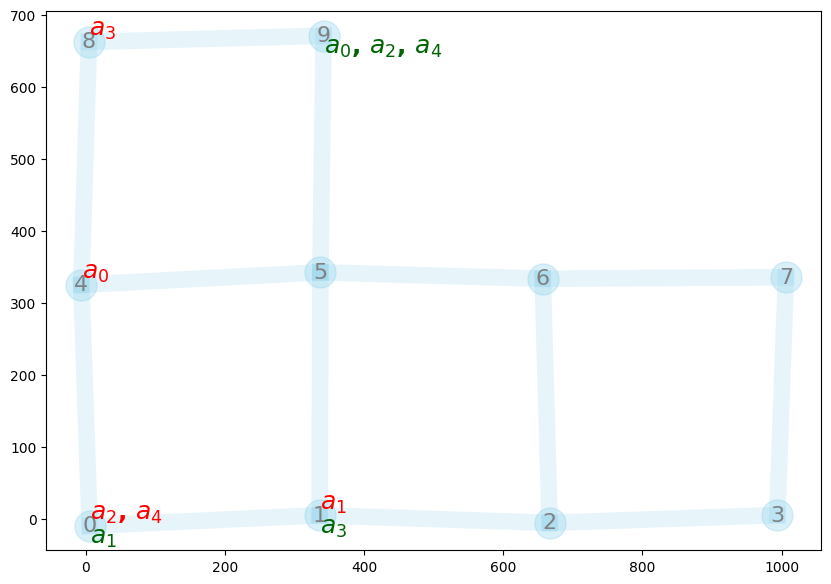

In [2]:
importlib.reload(flpoAgent)
importlib.reload(createEnv)
importlib.reload(supporting_functions)

# generate waypoints and the adjacency matrix
n_waypoints = 10
n_agents = 5
tolArray = np.random.uniform(5.0, 5.0, n_waypoints)

# Grid network parameters
grid_params = {
    'type':'grid',
    'n_points':n_waypoints,
    'grid_size':1000,
    'noise_factor':10
}

# Ring network parameters
ring_params = {
    'type':'ring',
    'num_rings':3,
    'points_per_ring':int(n_waypoints/3),
    'center_distance':200,
    'deformation_level':50.0,
    'extra_connections':0.00,
    'missing_connections':0.05
}

# create a mars environment
mars = createEnv.MARS(
    n_waypoints, 
    n_agents, 
    tolArray, 
    grid_params, 
    seed=10, 
    printFlag=True)

# compute conflict cost
beta0=1e-8
gamma_t = 5
gamma_c = 7.5
coeff_t = 50
coeff_c = 5.0
# calculate conflict cost
# print(f'mars_schedule:\n{np.round(mars.sched_mat,2)}')
# Xi = mars.agents[1].returnStageWiseCost(mars.sched_mat[1,:], mars.dist_mat, gamma_t, coeff_t)
# Pb = mars.agents[1].getPathAssociations(mars.sched_mat[1,:], mars.dist_mat, beta0, gamma_t, coeff_t)
# print(f'agent start:{mars.agents[1].s}\nprobability:\n{Pb[1]}\nstageWiseCost:{Xi[1]}')

reach_mat = mars.calc_agent_reach_mat(
        mars.sched_mat, 
        beta=beta0, gamma=gamma_t, coeff=coeff_t)
filter_wp = np.ones(shape=reach_mat.shape)
filter_wp[reach_mat <= 1.0e-10] = 0.0 
print(f'reach_mat')
print(f'filter_wp:\n{filter_wp}')
mars.transportCost(mars.sched_mat, beta=beta0, gamma=gamma_t, coeff=coeff_t)
print(f'transport_cost:\n{mars.C_agents}')
mars.conflictCost(mars.sched_mat, gamma=gamma_c, coeff=coeff_c, filter_wp=filter_wp)
print(f'conflict_cost:\n{mars.C_wp_conflict}')

# mars visualization
# agent_routes, agent_schedules, agent_colors = createEnv.calc_agent_routes_and_schedules(mars, Pb_a=[], printRoutes=False)
cmap = get_cmap('tab20')
agent_colors = {a: cmap(i / mars.n_agents) for i, a in enumerate(range(mars.n_agents))}
createEnv.plotNetwork(mars=mars, figuresize=(10,7), routes=[], agent_colors=agent_colors, showEdgeLength=False, plotPaths=False)

# agent visualization
show_graph=0
if show_graph:
    for i,v in enumerate(mars.agents):
        v.showGraph(mars.wp_locations, mars.dist_mat, mars.mask, mars.sched_mat[i,:], figuresize=(10,5), showEdgeTimeLim=True)



### Write a code to test stagewise cost function calculation based on mean speed of the agents

In [3]:
# agent_0 = mars.agents[2]
# agent_0.returnStageWiseCost_v1(mars.sched_mat[0,:], mars.dist_mat)
# agent_0.getFreeEnergy_s_v1(mars.sched_mat[0,:], mars.dist_mat, beta=1e-5)

In [4]:
# sched0_init = mars.sched_mat[0,:]
# lb0 = np.zeros(sched0_init.shape)
# ub0 = 100 * np.ones(lb0.shape)
# bounds = Bounds(lb0, ub0)

In [5]:
# beta_min = 1e-5
# beta_max = 1e3
# beta_grow = 3
# beta = beta_min
# beta_arr = []
# while beta <= beta_max:
#     beta_arr.append(beta)
#     beta = beta * beta_grow

In [6]:
# for i, b in enumerate(beta_arr):
#     res = minimize(
#         agent_0.getFreeEnergy_s_v1,
#         sched0_init,
#         args = (mars.dist_mat, b),
#         method='slsqp',
#         options={'disp':0},
#         bounds=bounds
#     )
#     sched0_init = res.x

#     print(f'beta:{beta:.4e}\tfreeEnergy:{res.fun:.4f}')



In [7]:
# Pb = agent_0.getPathAssociations_v1(sched0_init, mars.dist_mat, beta=1e8)
# # agent_0.calc_probability_of_reach(Pb)
# agent_0.calc_route_and_schedule(sched0_init, mars.dist_mat, Pb)
# agent_0.route

In [8]:
# agent_0.fin_sched

### Test the optimization for all the agents together

In [9]:
# annealing
sched_vec0 = mars.sched_mat.flatten()

lb = np.ones(shape=sched_vec0.shape)*mars.t_start_min
ub = np.ones(shape=sched_vec0.shape)*100.0
print(f'agent start nodes {mars.agents[0].s}')
print(f'init schedule vec {sched_vec0}')
print(f'ub {ub}')
print(f'lb {lb}')

sched_bounds = [lb,ub]
beta_lims = [1e-6,1]
beta_grow = 1.5
# opts = {'gtol':1e-4, 'verbose':0, 'maxiter':200}
opts = {'disp':0}
C_arr, sched_vec, rt_arr, reach_mat_beta_data, filter_wp_beta_data, beta_arr, gamma_arr, conflict_C_arr, Pb_a = mars.annealing_v1(beta_lims=beta_lims,
                                            beta_grow=beta_grow,
                                            sched_vec0=sched_vec0,
                                            init_sched_bounds=sched_bounds,
                                            optimize_opt=opts,
                                            allowPrintAnneal=True,
                                            allowPrintOptimize=False)

# C_arr, sched_vec, rt_arr, reach_mat_beta_data, filter_wp_beta_data, beta_arr, gamma_arr, conflict_C_arr, Pb_a = mars.annealing(beta_lims=beta_lims,
#                                             beta_grow=beta_grow,
#                                             sched_vec0=sched_vec0,
#                                             init_sched_bounds=sched_bounds,
#                                             optimize_opt=opts,
#                                             allowPrintAnneal=True,
#                                             allowPrintOptimize=False)



agent start nodes 9
init schedule vec [54.08809313 13.14581524 41.36673744 77.87288083 58.39013657 18.26314363
 82.60822477 10.54018335 28.35766786  0.          0.         76.54558182
  1.17880294 61.19433411 33.18822557 55.96483655 33.54996465 41.1182546
  7.68555017 85.30429903 43.99874555 12.19541471 73.17346246 13.87824655
 76.68800492 83.19897678 30.97780552 59.75822903 87.23924598  0.
 46.7403279   0.         29.60686989 13.12910529 84.28179335 65.90363039
 59.5439605  43.63536983 35.62503268 58.71309253 14.9471337  17.12385982
 39.71645229 63.79515643 37.2519952   0.24067613 54.88163557 12.69718415
  7.97926806  0.        ]
ub [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100.]
lb [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.


Optimization Results
initial schedule:[54.08809313 13.14581524 41.36673744 77.87288083 58.39013657 18.26314363
 82.60822477 10.54018335 28.35766786  0.          0.         76.54558182
  1.17880294 61.19433411 33.18822557 55.96483655 33.54996465 41.1182546
  7.68555017 85.30429903 43.99874555 12.19541471 73.17346246 13.87824655
 76.68800492 83.19897678 30.97780552 59.75822903 87.23924598  0.
 46.7403279   0.         29.60686989 13.12910529 84.28179335 65.90363039
 59.5439605  43.63536983 35.62503268 58.71309253 14.9471337  17.12385982
 39.71645229 63.79515643 37.2519952   0.24067613 54.88163557 12.69718415
  7.97926806  0.        ]
final schedule:
[[9.68742386e-03 8.27057629e-03 5.43096119e-04 1.30675369e-03
  2.37175500e+01 1.42076503e+01 6.84775245e-03 6.38174356e-03
  1.44001216e+01 5.07106921e+00]
 [2.41207347e-03 1.04874573e+01 5.90520846e-03 9.25031537e-03
  5.18781229e-03 8.71413780e-03 2.70928498e-03 7.63527498e-03
  1.02392524e-04 3.93488090e-04]
 [4.30092769e+01 3.20649993e+0

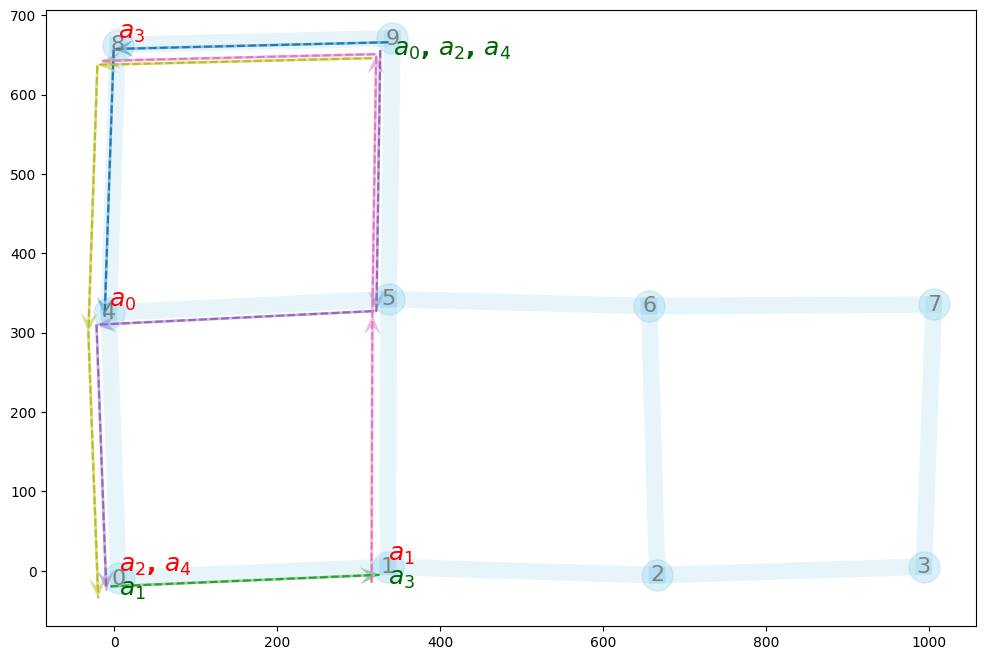

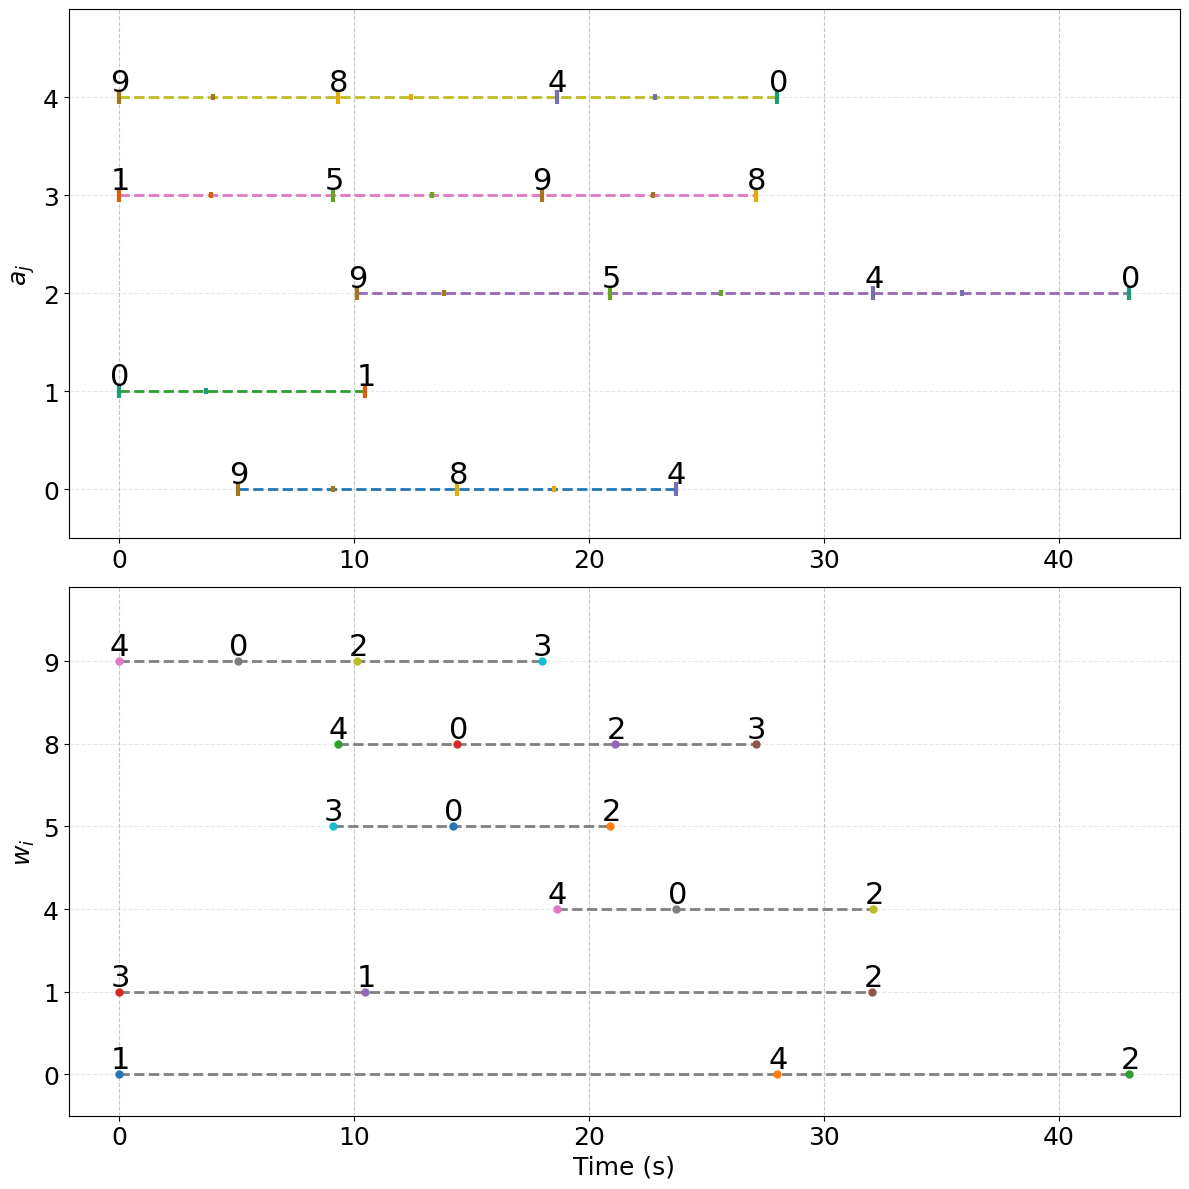

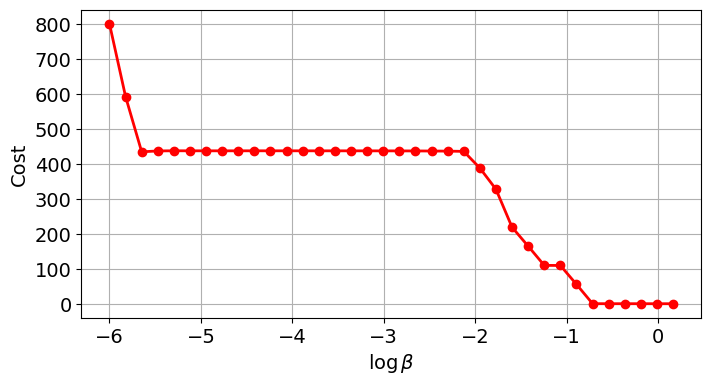

In [10]:
importlib.reload(createEnv)
importlib.reload(flpoAgent)
print('\nOptimization Results')
print(f'initial schedule:{sched_vec0}')
print(f'final schedule:\n{mars.sched_mat}')
print(f'processing time:\n{mars.process_T}')
print(f'cost:{C_arr[-1]}')

agent_routes, agent_schedules = createEnv.calc_agent_routes_and_schedules(mars, Pb_a, printRoutes=True)
createEnv.plotNetwork(mars=mars, figuresize=(12,8), routes=agent_routes, agent_colors=agent_colors, showEdgeLength=False, plotPaths=True)
# createEnv.plot_vehicle_routes(agent_routes, agent_schedules, mars.process_T, agent_colors)
# createEnv.plot_waypoint_schedules(filter_wp_beta_data[-1], mars.sched_mat)
createEnv.plot_waypoint_agent_schedules(
    agent_routes, agent_schedules, mars.sched_mat, 
    filter_wp_beta_data[-1], mars.process_T, agent_colors,
    figuresize=(12,12))
plt.figure(figsize=(8,4))
plt.plot(np.log(beta_arr)/np.log(10), conflict_C_arr.sum(axis=1), marker='o', linewidth=2, color='red')
plt.xlabel(rf'$\log\beta$', fontsize=14)
plt.ylabel(rf'Cost', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title(rf'Cumulative conflict management')
# plt.legend([rf"$w_{str(i)}$" for i in range(conflict_C_arr.shape[1])])
plt.grid()
plt.show()
# agent visualization
show_graph=0
if show_graph:
    for i,v in enumerate(mars.agents):
        v.showGraph(mars.wp_locations, mars.dist_mat, mars.mask, mars.sched_mat[i,:], figuresize=(10,5), showEdgeTimeLim=True)

# # show path associations
# Pb = mars.agents[0].getPathAssociations(mars.sched_mat[0,:], mars.dist_mat, beta_arr[-1], gamma_arr[-1][0], gamma_arr[-1][2])
# Xi = mars.agents[0].returnStageWiseCost(mars.sched_mat[5,:], mars.dist_mat, gamma_arr[-1][0], gamma_arr[-1][2])
# mars.agents[0].getFreeEnergy_s(mars.sched_mat[0,:], mars.dist_mat, beta=beta_arr[-1], gamma=gamma_arr[-1][0], coeff=gamma_arr[-1][2])
# print(f'freeEnergy: {mars.agents[0].freeEnergy_s}')
# print(f'path association:\n{Pb}')
# print(f'path costs:\n{Xi}')
# # test weighedLassoCost
# cost = createEnv.weighedLassoCost(mars, mars.sched_mat, beta=beta_arr[-1], gamma=beta_arr[-1], tol=1e-3)
